In [343]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [344]:
nanum_path = os.path.join("NanumSquareRoundB.ttf")

In [345]:
marketing_data = pd.read_csv('../dataset/marketing_campaign.csv', sep='\t')
marketing_data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [346]:
marketing_data.loc[marketing_data["Marital_Status"]=="Alone","Marital_Status"]="Else"
marketing_data.loc[marketing_data["Marital_Status"]=="Absurd","Marital_Status"]="Else"
marketing_data.loc[marketing_data["Marital_Status"]=="YOLO","Marital_Status"]="Else"

/var/folders/gq/ls0zk8kx4sv1fljb1rrkwk340000gn/T/ipykernel_6880/3028992151.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=marketing_data, x='Year_Birth', shade=True)
/Users/hun/Desktop/KDT_AI-main/month1/[KDT] 인공지능 5주차 실습/monthyl_proj_1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hun/Desktop/KDT_AI-main/month1/[KDT] 인공지능 5주차 실습/monthyl_proj_1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/gq/ls0zk8kx4sv1fljb1rrkwk340000gn/T/ipykernel_6880/30

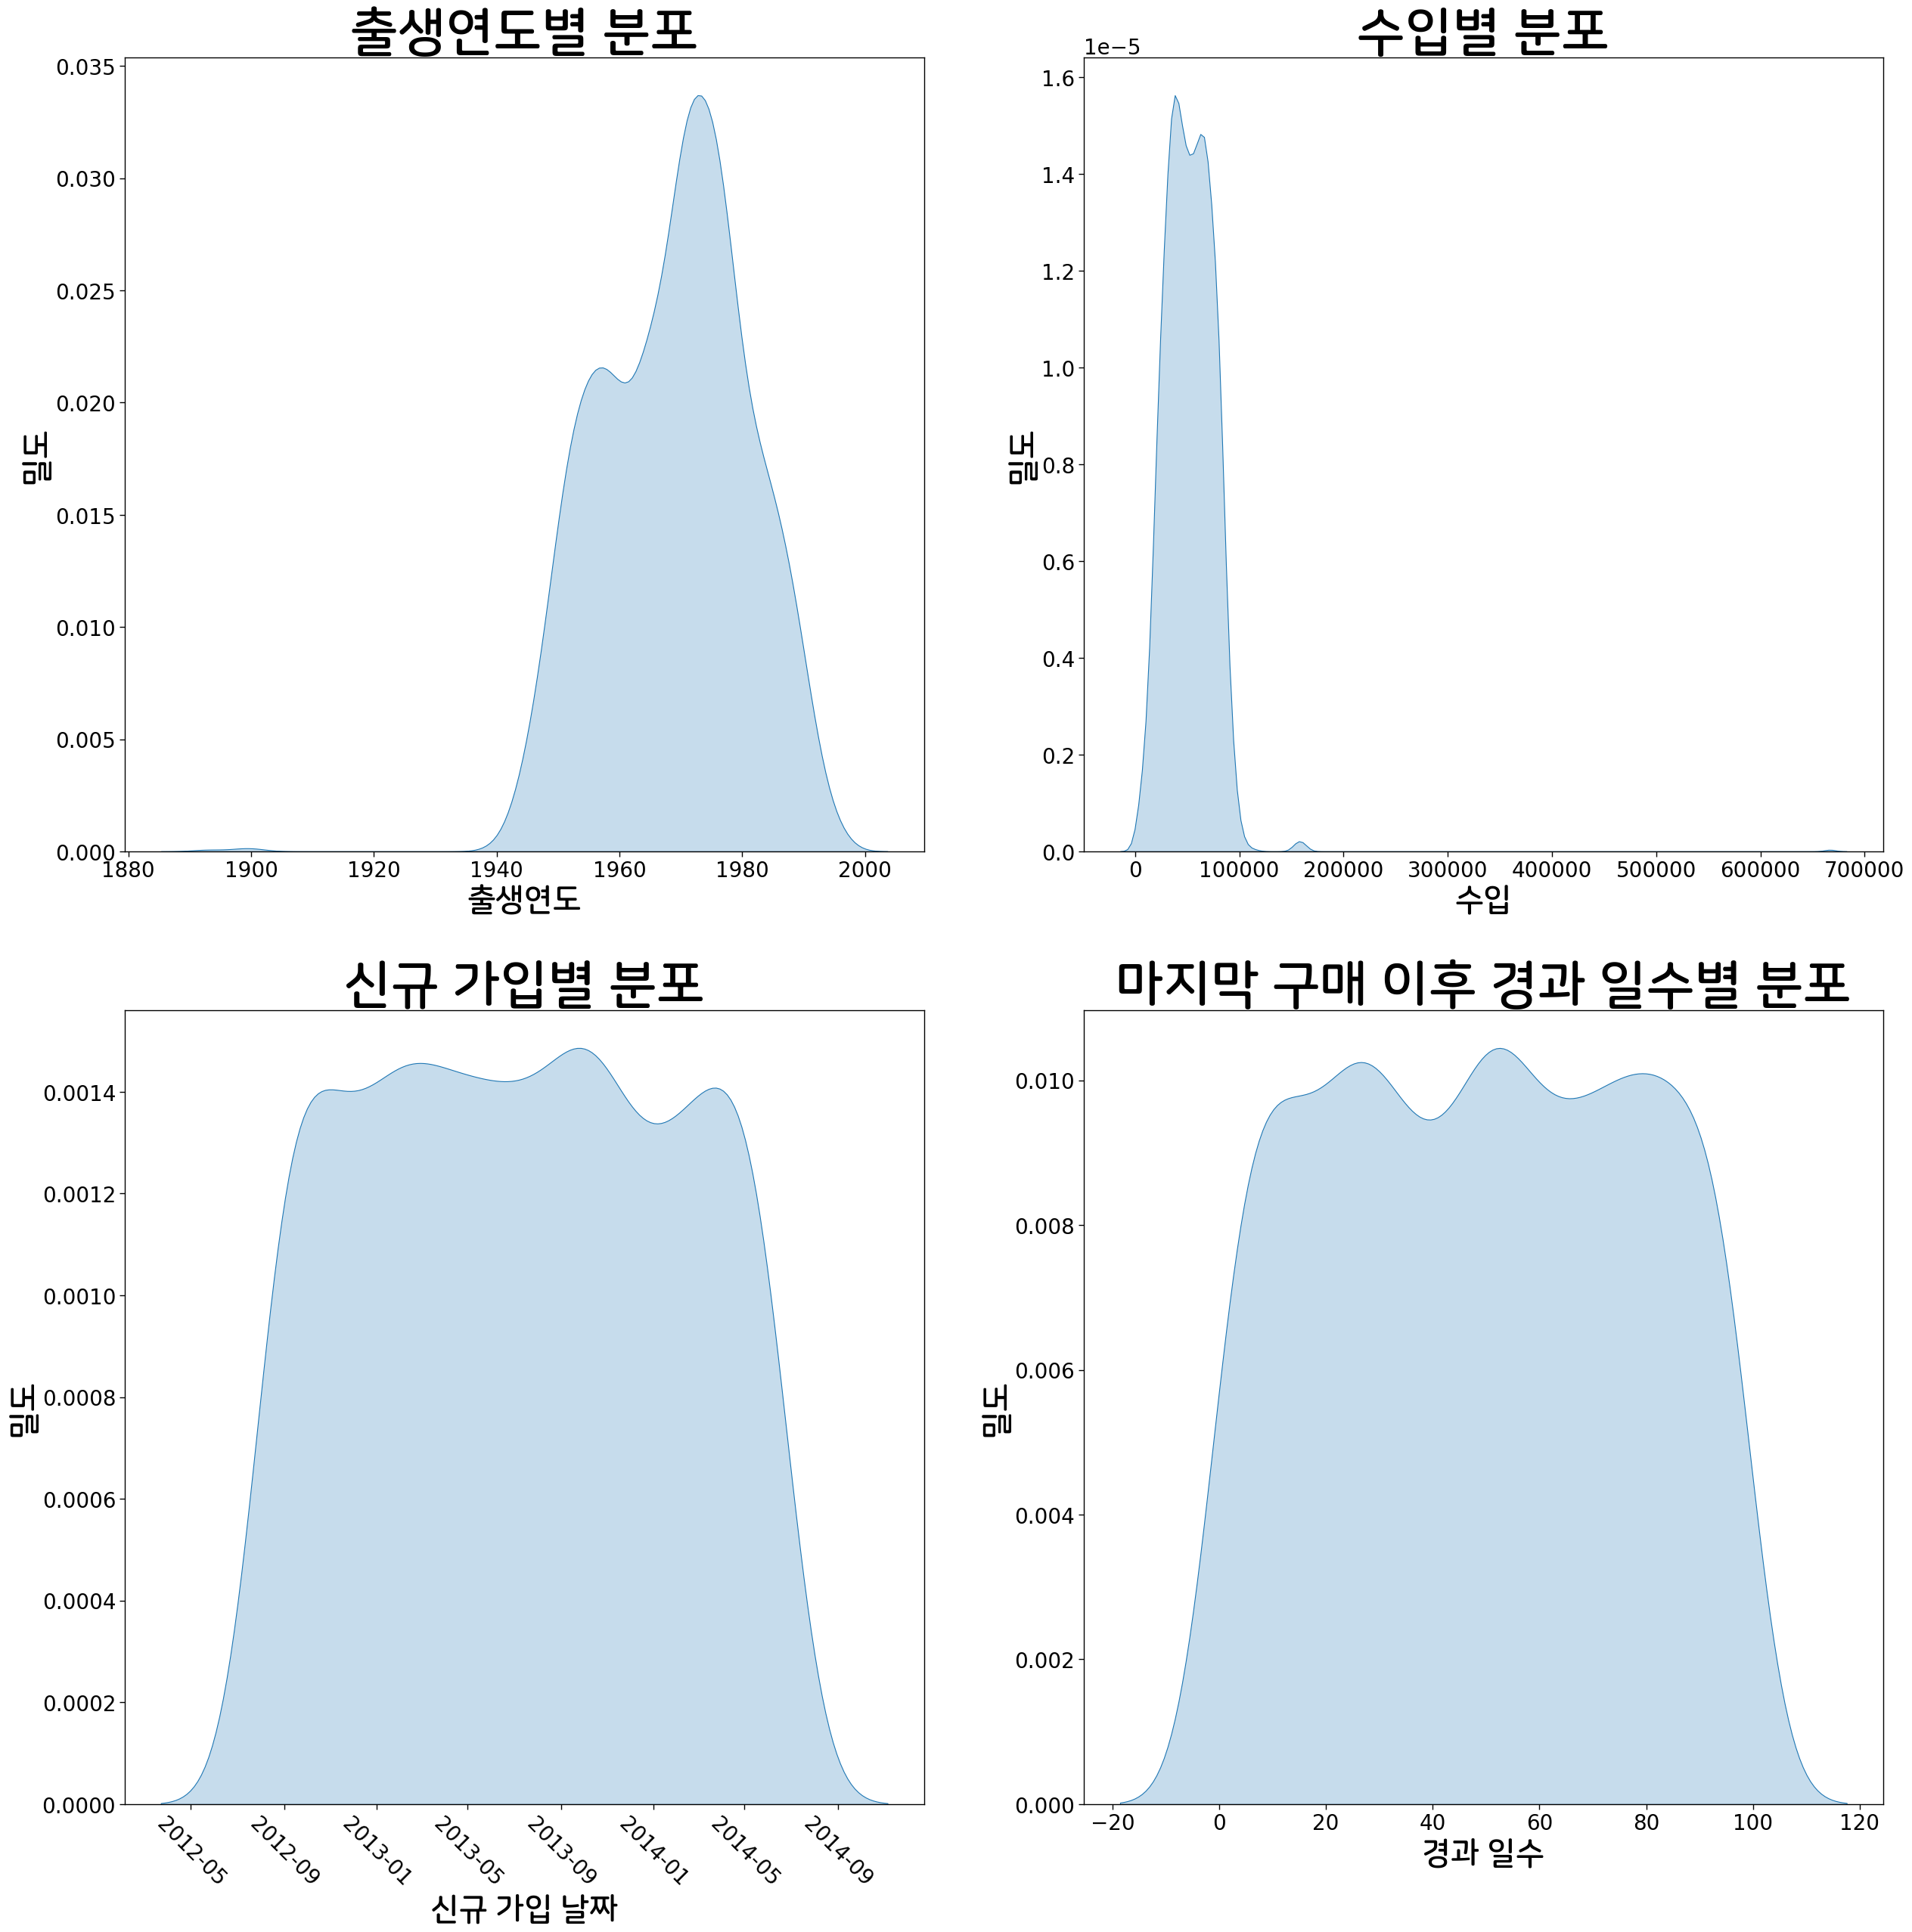

In [347]:
plt.figure(figsize=(30,30))

plt.subplot(2,2,1)
sns.kdeplot(data=marketing_data, x='Year_Birth', shade=True)
plt.xlabel('출생연도', fontproperties=fm.FontProperties(fname=nanum_path, size=30))
plt.ylabel('밀도', fontproperties=fm.FontProperties(fname=nanum_path, size=30))
plt.title('출생연도별 분포', size=30, fontproperties=fm.FontProperties(fname=nanum_path, size=50))

plt.subplot(2,2,2)
sns.kdeplot(data=marketing_data, x='Income', shade=True)
plt.xlabel('수입', fontproperties=fm.FontProperties(fname=nanum_path, size=30))
plt.ylabel('밀도', fontproperties=fm.FontProperties(fname=nanum_path, size=30))
plt.title('수입별 분포', size=30, fontproperties=fm.FontProperties(fname=nanum_path, size=50))

plt.subplot(2,2,3)
marketing_data.Dt_Customer = pd.to_datetime(marketing_data.Dt_Customer, format='%d-%m-%Y')
sns.kdeplot(data=marketing_data, x='Dt_Customer', shade=True)
plt.xticks(size=20, rotation=-45)
plt.xlabel('신규 가입 날짜', fontproperties=fm.FontProperties(fname=nanum_path, size=30))
plt.ylabel('밀도', fontproperties=fm.FontProperties(fname=nanum_path, size=30))
plt.title('신규 가입별 분포', size=30, fontproperties=fm.FontProperties(fname=nanum_path, size=50))

plt.subplot(2,2,4)
sns.kdeplot(data=marketing_data, x='Recency', shade=True)
plt.xlabel('경과 일수', fontproperties=fm.FontProperties(fname=nanum_path, size=30))
plt.ylabel('밀도', fontproperties=fm.FontProperties(fname=nanum_path, size=30))
plt.title('마지막 구매 이후 경과 일수별 분포', size=30, fontproperties=fm.FontProperties(fname=nanum_path, size=50))

plt.show()

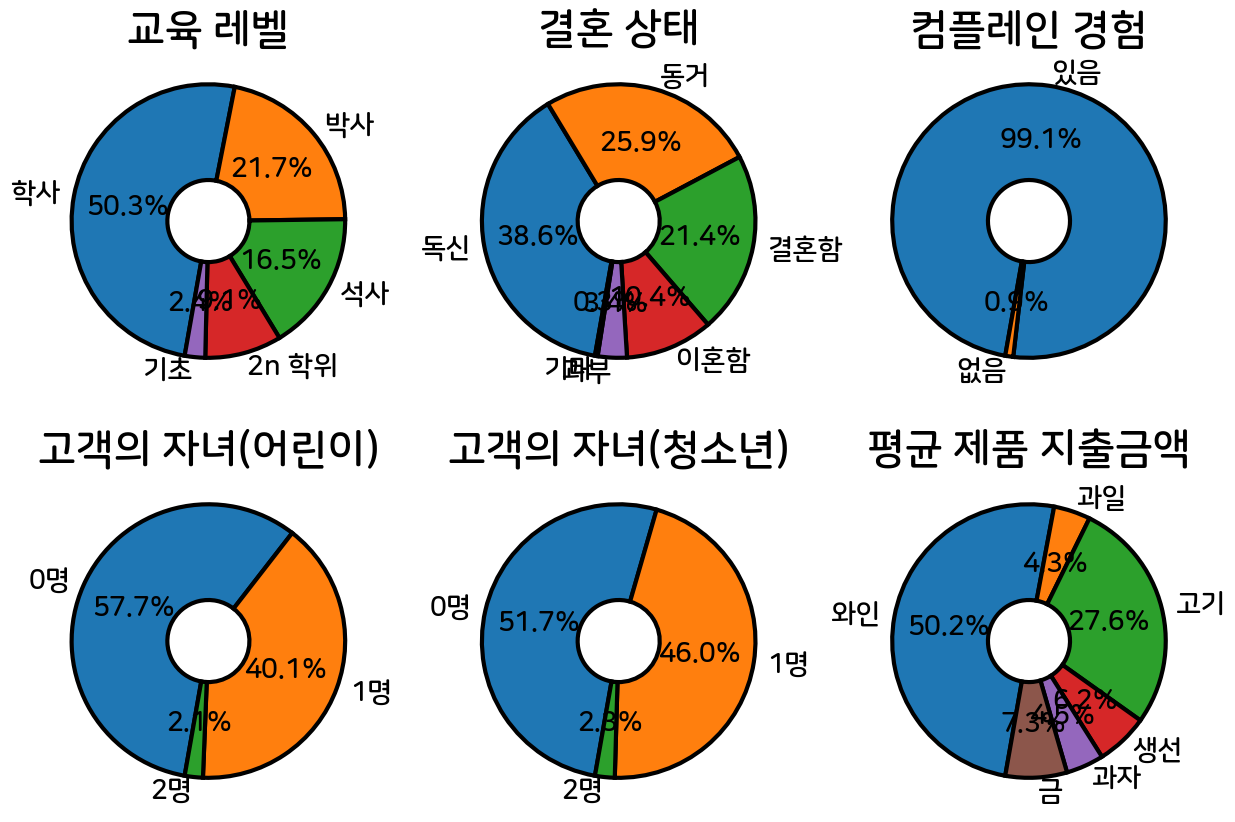

In [348]:
plt.figure(figsize=(15,10))

columns_list = ['Education', 'Marital_Status', 'Complain', 'Kidhome', 'Teenhome']
labels_dic = {
    'Education': ['학사', '박사', '석사', '2n 학위', '기초'],
    'Marital_Status': ['독신', '동거', '결혼함', '이혼함', '과부', '기타'],
    'Complain': ['있음', '없음'], 
    'Kidhome': ['0명', '1명', '2명'], 
    'Teenhome': ['0명', '1명', '2명']
}
titles_list = ['교육 레벨', '결혼 상태', '컴플레인 경험', '고객의 자녀(어린이)', '고객의 자녀(청소년)']

for idx in range(5):
    plt.subplot(2,3,idx+1)
    data = marketing_data[columns_list[idx]].value_counts()
    labels = labels_dic[columns_list[idx]]
    title = titles_list[idx]
    patches, texts, autotexts = \
    plt.pie(data, labels=labels, autopct='%0.1f%%', startangle=260, counterclock=False, 
            wedgeprops={'width': 0.7, 'edgecolor': 'black', 'linewidth': 3}, 
            textprops={'size':15})
    plt.setp(autotexts, fontproperties=fm.FontProperties(fname=nanum_path, size=20))
    plt.setp(texts, fontproperties=fm.FontProperties(fname=nanum_path, size=20))
    plt.title(title, size=30, fontproperties=fm.FontProperties(fname=nanum_path, size=30))

plt.subplot(2,3,6)
mnt_data = marketing_data[[col for col in marketing_data.columns if 'Mnt' in col]].mean()
mnt_labels = ['와인', '과일', '고기', '생선', '과자', '금']
patches, texts, autotexts = \
plt.pie(mnt_data, labels=mnt_labels, autopct='%0.1f%%', startangle=260, counterclock=False,
         wedgeprops={'width': 0.7, 'edgecolor': 'black', 'linewidth': 3}, 
         textprops={'size':15})
plt.setp(autotexts, fontproperties=fm.FontProperties(fname=nanum_path, size=20))
plt.setp(texts, fontproperties=fm.FontProperties(fname=nanum_path, size=20))
plt.title('평균 제품 지출금액', size=30, fontproperties=fm.FontProperties(fname=nanum_path, size=30))

plt.show()

/var/folders/gq/ls0zk8kx4sv1fljb1rrkwk340000gn/T/ipykernel_6880/1387633728.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=marketing_data, x=columns_list[idx], shade=True)
/Users/hun/Desktop/KDT_AI-main/month1/[KDT] 인공지능 5주차 실습/monthyl_proj_1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hun/Desktop/KDT_AI-main/month1/[KDT] 인공지능 5주차 실습/monthyl_proj_1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/gq/ls0zk8kx4sv1fljb1rrkwk340000gn/T/ipykernel_68

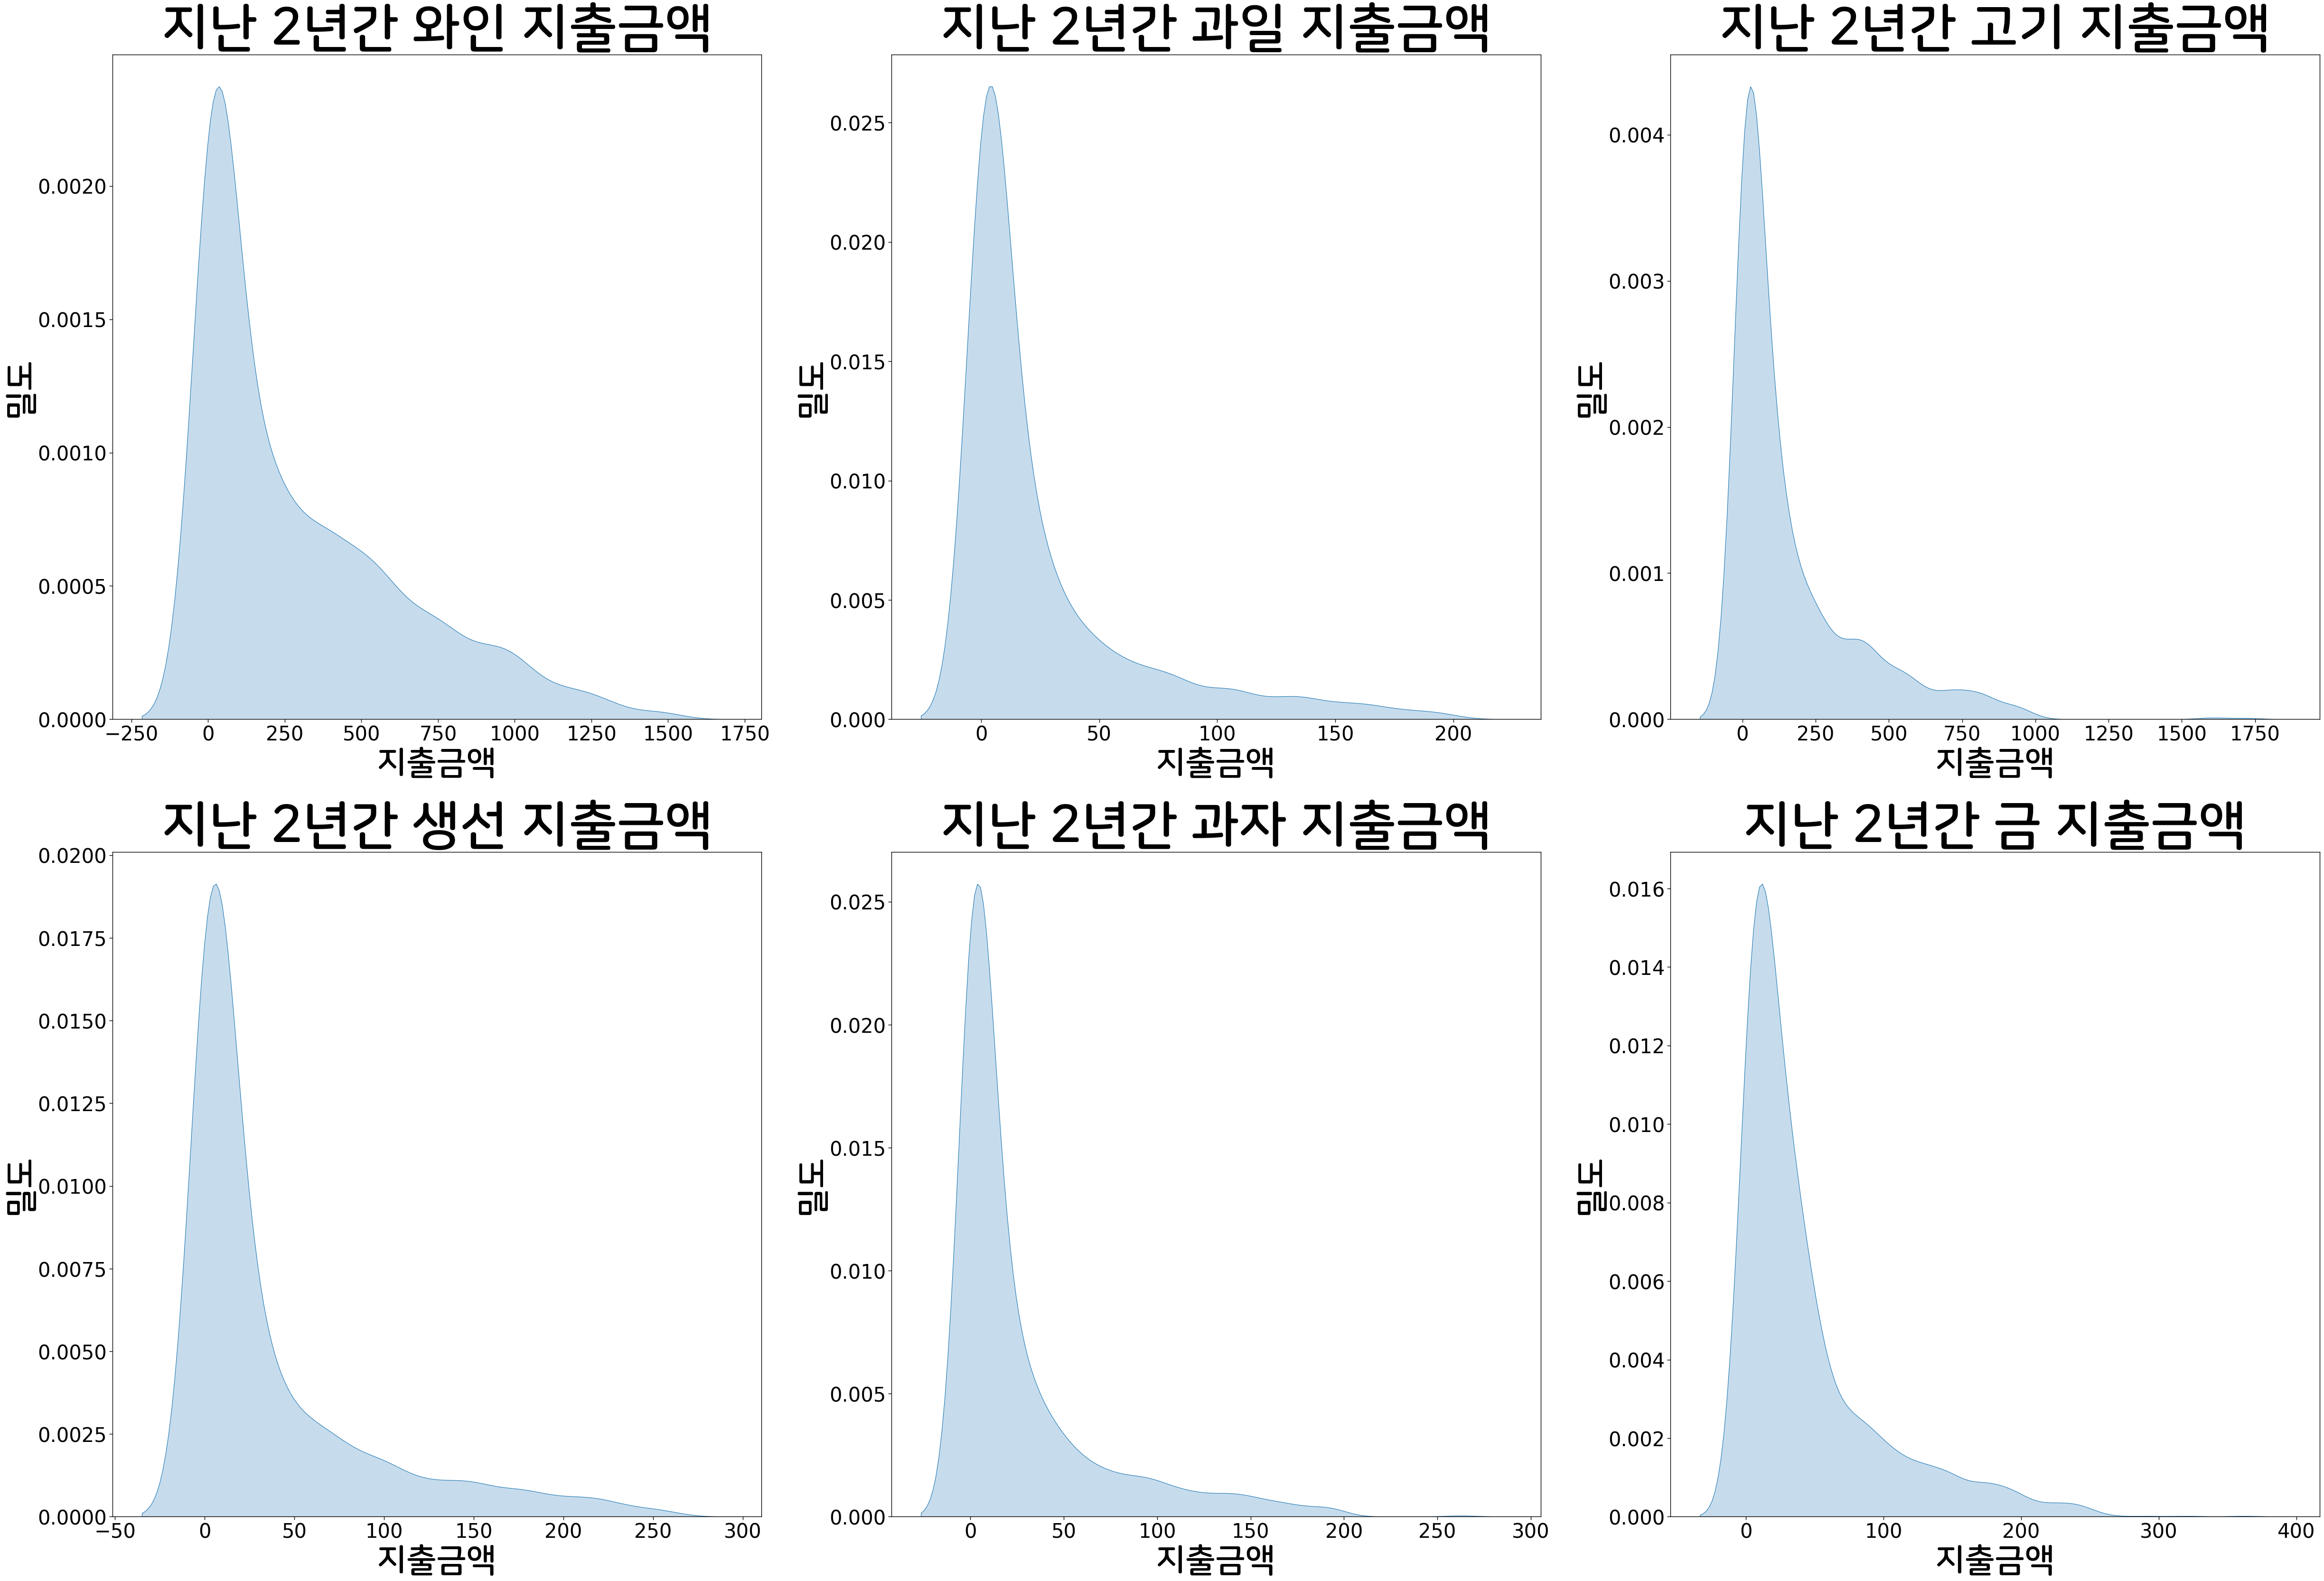

In [349]:
plt.figure(figsize=(60,40))

columns_list = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
titles_list = ['와인', '과일', '고기', '생선', '과자', '금']
for idx in range(6):
    plt.subplot(2,3,idx+1)
    sns.kdeplot(data=marketing_data, x=columns_list[idx], shade=True)
    plt.xlabel('지출금액', fontproperties=fm.FontProperties(fname=nanum_path, size=50))
    plt.xticks(size=30)
    plt.ylabel('밀도', fontproperties=fm.FontProperties(fname=nanum_path, size=50))
    plt.yticks(size=30)
    plt.title('지난 2년간 {} 지출금액'.format(titles_list[idx]), size=30, 
              fontproperties=fm.FontProperties(fname=nanum_path, size=80))

plt.show()